## Load and reload stuff

In [1]:
%pylab --no-import-all inline
from importlib import reload

Populating the interactive namespace from numpy and matplotlib


In [3]:
%load_ext Cython

In [2]:
# %%cython 
import metadmodel as mm

In [22]:
reload(mm.Simulation)
reload(mm.FES)
reload(mm.Particle)

<module 'metadmodel.Particle' from '/Users/theavey/Google Drive/BU/CokerResearchGroup/metadmodel/Particle.py'>

In [10]:
from scipy.stats import norm

## Autograd Play

In [92]:
import autograd as ag
import autograd.numpy as np

In [35]:
tf = lambda x: x**2 + x**3 + 1

In [27]:
gt = ag.grad(lambda x: x**2 + x**3 + 1)

In [36]:
tf(1.)

3.0

In [37]:
gt(1.)

array(5.0)

In [23]:
gt2 = ag.grad(lambda x: np.sin(2*x)+1) 

In [24]:
gt2(1.)

-0.83229367309428481

In [17]:
gt2(1.)

-0.83229367309428481

In [25]:
ag.jacobian?

In [28]:
def xy_func(x, y):
    return x**2 - y**2

In [33]:
gxyx = ag.grad(xy_func, 0)
gxyy = ag.grad(xy_func, 1)

In [34]:
gxyx(1., 1.)

2.0

In [32]:
ag.grad?

## Try it out

In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
import math

In [2]:
from importlib import reload

In [3]:
import metad_model as mm

In [139]:
reload(mm.Simulation)

<module 'metad_model.Simulation' from '/Users/theavey/Google Drive/BU/CokerResearchGroup/metad_model/Simulation.py'>

In [93]:
np.power?

### SHO

In [14]:
fes = mm.FES.FES1D(lambda x: x**2)
part = mm.Particle.Particle(fes, -1, 0, mass=4)
sim = mm.Simulation.Simulation(1, part)

In [15]:
sim.run(100)

Done running 100!


/home/theavey/anaconda3/envs/py3.6/lib/python3.6/site-packages/autograd/convenience_wrappers.py:201: UserWarning: Casting int to float to handle differentiation.
  warnings.warn("Casting int to float to handle differentiation.")


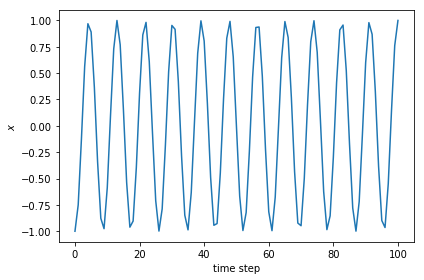

In [16]:
sho_fig = sim.plot_trajectory()

### SHO w/ thermostat

In [165]:
fes = mm.FES.FES1D(lambda x: x**2)
part = mm.Particle.Particle(fes, -1., 0., mass=4., temp=1., nh_const=10000.)
sim = mm.Simulation.Simulation(1, part)

In [166]:
sim.run(10000)

On step 1000, 10.0% done.
On step 2000, 20.0% done.
On step 3000, 30.0% done.
On step 4000, 40.0% done.
On step 5000, 50.0% done.
On step 6000, 60.0% done.
On step 7000, 70.0% done.
On step 8000, 80.0% done.
On step 9000, 90.0% done.
On step 10000, 100.0% done.
Done running 10000 steps!


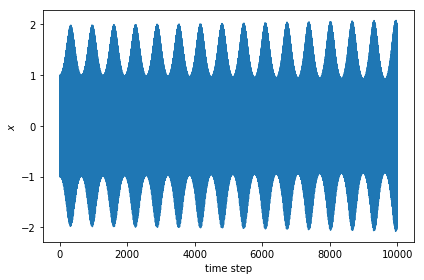

In [167]:
sho_temp_fig1000 = sim.plot_trajectory()

(array([ 1564.,  1183.,   876.,   772.,   740.,   708.,   740.,   815.,
         1092.,  1510.]),
 array([ -8.02625777e-03,  -6.42214217e-03,  -4.81802658e-03,
         -3.21391098e-03,  -1.60979539e-03,  -5.67979201e-06,
          1.59843580e-03,   3.20255140e-03,   4.80666699e-03,
          6.41078259e-03,   8.01489819e-03]),
 <a list of 10 Patch objects>)

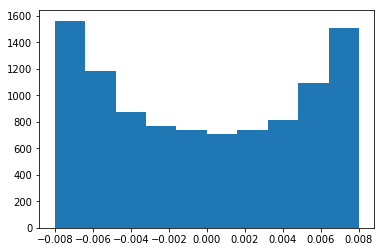

In [168]:
plt.hist(part.frics)

### Symmetric double well

In [181]:
fes = mm.FES.FES1D(lambda x: 0.01*np.power(x,4) - 0.2*np.power(x,2))

part = mm.Particle.Particle(fes, -4.75, mass=1.5, temp=1, nh_const=1000, time_step_size=0.5)

sim = mm.Simulation.Simulation(1, part)

In [182]:
sim.run(10000)

On step 1000, 10.0% done.
On step 2000, 20.0% done.
On step 3000, 30.0% done.
On step 4000, 40.0% done.
On step 5000, 50.0% done.
On step 6000, 60.0% done.
On step 7000, 70.0% done.
On step 8000, 80.0% done.
On step 9000, 90.0% done.
On step 10000, 100.0% done.
Done running 10000 steps!


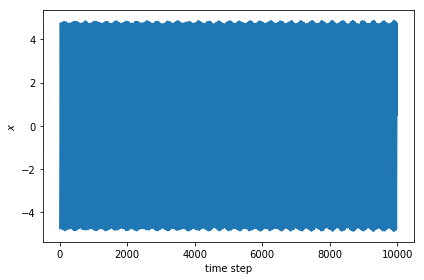

In [183]:
sdw_fig = sim.plot_trajectory()

(array([  276.,  1152.,  1539.,  1105.,   980.,   960.,  1096.,  1527.,
         1101.,   264.]),
 array([ -4.38742444e-03,  -3.50009677e-03,  -2.61276910e-03,
         -1.72544144e-03,  -8.38113768e-04,   4.92139008e-05,
          9.36541569e-04,   1.82386924e-03,   2.71119691e-03,
          3.59852457e-03,   4.48585224e-03]),
 <a list of 10 Patch objects>)

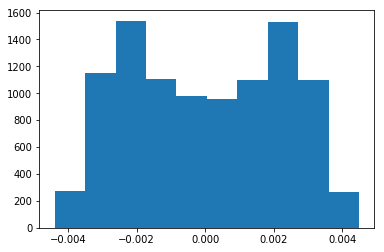

In [184]:
plt.hist(part.frics)

In [43]:
x = np.linspace(-5, 5, 250)

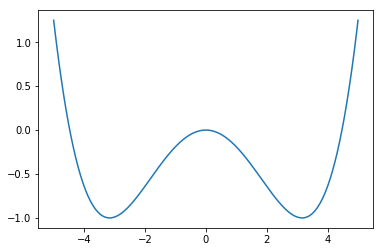

In [73]:
plt.plot(x, fes._func(x))

In [81]:
fes._func(3.1)

-0.99847900000000034

## Try out metad

### NVE

In [60]:
reload(mm.Simulation)
reload(mm.FES)
reload(mm.Particle)

<module 'metad_model.Particle' from '/home/theavey/bu_drive/BU/CokerResearchGroup/metad_model/Particle.py'>

In [165]:
fesm = mm.FES.MetadFES1D(lambda x: 0.01*np.power(x,4) - 0.2*np.power(x,2), 0.2, 0.2)
partm = mm.Particle.Particle(fesm, -3.5, 0.)
simm = mm.Simulation.Simulation(1, partm)

In [166]:
simm.run(500)

Done running 500!


the dimensionality is 1


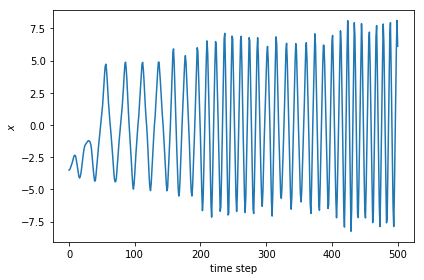

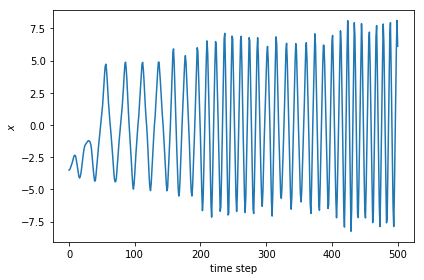

In [168]:
simm.plot_trajectory()

Done running 500!
the dimensionality is 1


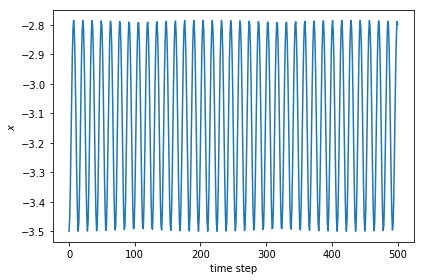

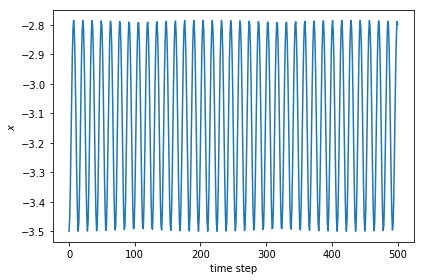

In [169]:
fesnm = mm.FES.FES1D(lambda x: 0.01*np.power(x,4) - 0.2*np.power(x,2))
partnm = mm.Particle.Particle(fesnm, -3.5, 0.)
simnm = mm.Simulation.Simulation(1, partnm)
simnm.run(500)
simnm.plot_trajectory()

### Metad with thermostat

In [185]:
fesm = mm.FES.MetadFES1D(lambda x: 0.01*np.power(x,4) - 0.4*np.power(x,2), 
                         width=0.5, height=0.2)
partm = mm.Particle.Particle(fesm, -2., 0, mass=20., temp=0.5, nh_const=5000.)
simm = mm.Simulation.Simulation(1, partm, metad_freq = 25)

In [186]:
simm.run(1000)

On step 1000, 100.0% done.
Done running 1000 steps!


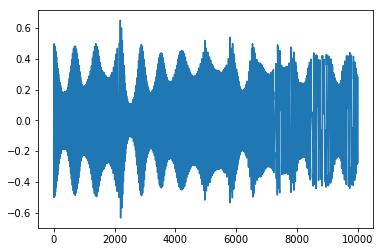

In [63]:
plt.plot(simm.velocities)

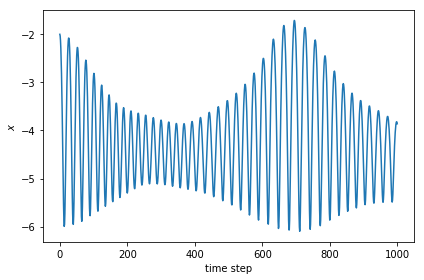

In [187]:
fig_colder = simm.plot_trajectory()

(array([ 128.,   73.,   52.,   56.,   67.,   67.,   90.,  127.,  193.,  147.]),
 array([ -8.05748682e-03,  -6.04325477e-03,  -4.02902273e-03,
         -2.01479068e-03,  -5.58640182e-07,   2.01367340e-03,
          4.02790545e-03,   6.04213749e-03,   8.05636954e-03,
          1.00706016e-02,   1.20848336e-02]),
 <a list of 10 Patch objects>)

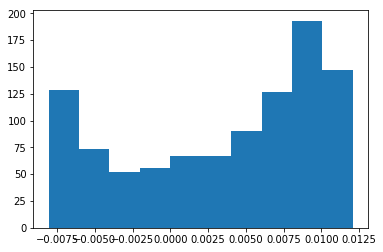

In [188]:
plt.hist(partm.frics)

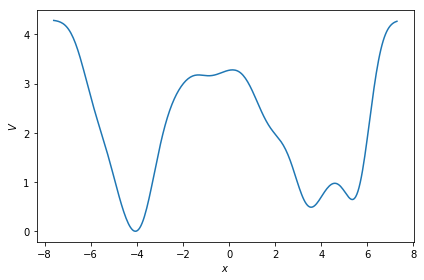

In [65]:
fig_colder_hills = simm.particle._FES.plot_hills()

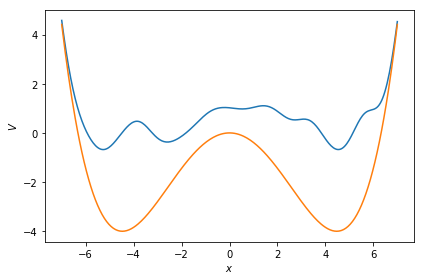

In [66]:
fig_colder_eff_fes = simm.particle._FES.plot_eff_fes(minmax=[-7.,7.])

In [150]:
simm.particle.fric

0.0

### Three well potential

In [4]:
# %%cython
def func(x: float) -> float:
    return -3 - x + 10 * x**2 + 1.5 * x**3 - 1.5 * x**4 - 0.1 * x**5 + 0.05 * x**6

def func10(x: float) -> float:
    return -30. - x + 100. * x**2 + 15. * x**3 - 15. * x**4 - 1. * x**5 + 0.5 * x**6
def func100(x: float) -> float:
    return -300. - x + 1000. * x**2 + 150. * x**3 - 150. * x**4 - 10. * x**5 + 5. * x**6

(-60, 40)

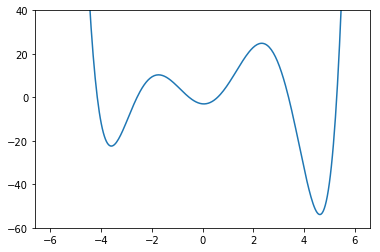

In [5]:
mima = 6
x = np.linspace(-mima, mima, 300)
fig, ax = plt.subplots()
ax.plot(x, func(x))
ax.set_ylim([-60,40])

In [66]:
fes3 = mm.FES.MetadFES1D(func100, 
                         width=1, height=250)
part3 = mm.Particle.Particle(fes3, 0, mass=1000., temp=1., nh_const=5, time_step_size=0.1)
sim3 = mm.Simulation.Simulation(1, part3, metad_freq = 50)

In [67]:
sim3.run(10000, status_int=500)

On step 500, 5.0% done.
On step 1000, 10.0% done.
On step 1500, 15.0% done.
On step 2000, 20.0% done.
On step 2500, 25.0% done.
On step 3000, 30.0% done.
On step 3500, 35.0% done.
On step 4000, 40.0% done.
On step 4500, 45.0% done.
On step 5000, 50.0% done.
On step 5500, 55.0% done.
On step 6000, 60.0% done.
On step 6500, 65.0% done.
On step 7000, 70.0% done.
On step 7500, 75.0% done.
On step 8000, 80.0% done.
On step 8500, 85.0% done.
On step 9000, 90.0% done.
On step 9500, 95.0% done.
On step 10000, 100.0% done.
Done running 10000 steps!


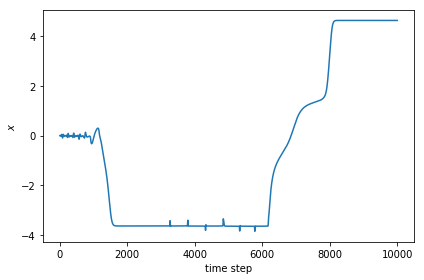

In [68]:
fig3 = sim3.plot_trajectory()

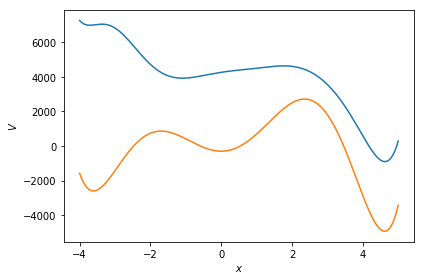

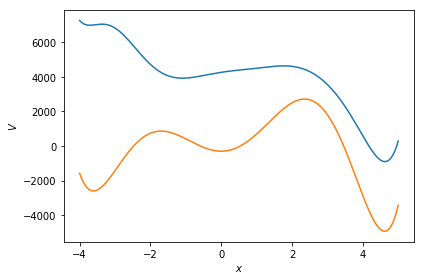

In [69]:
sim3.plot_eff_fes(minmax={-4,5})

(array([ 2024.,  2526.,  1070.,   778.,   772.,  1026.,   889.,   364.,
          250.,   301.]),
 array([ -4.78744861,  -0.15885271,   4.46974318,   9.09833908,
         13.72693498,  18.35553088,  22.98412678,  27.61272268,
         32.24131857,  36.86991447,  41.49851037]),
 <a list of 10 Patch objects>)

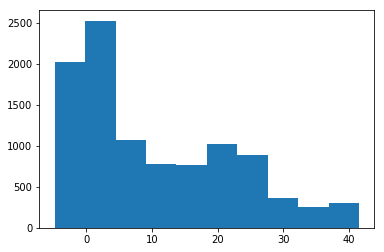

In [70]:
plt.hist(part3.frics)

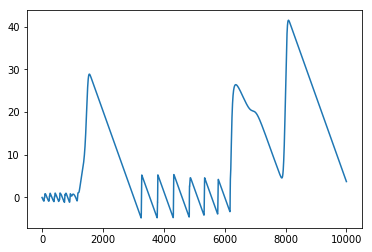

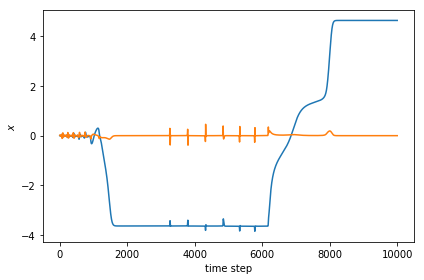

In [71]:
plt.plot(part3.frics)
sim3.plot_trajectory()

plt.plot(sim3.velocities)